In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Llamamos las tablas
db_airp= pd.read_csv('Datasets/airports.csv')
db_airp

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Timezone.1
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20,10,U,Pacific/Port_Moresby
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...
7693,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N
7694,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N
7695,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N


In [3]:
#Buscamos valores nulos tipo '\N', para que se localicen, se requiere agregar una '\' adicional
i=db_airp[db_airp['ICAO']=='\\N'] 
print(i)

                           Name              City   Country IATA ICAO  \
5860  Sun Island Resort and SPA  South Aari Atoll  Maldives   \N   \N   

      Latitude  Longitude  Altitude Timezone DST         Timezone.1  
5860  3.488334  72.862989         0       -3   N  America/Sao_Paulo  


In [4]:
#Columnas IATA e ICAO contienen nulos '\N', los cuales se tienen que eliminar
db_airp['IATA']=db_airp['IATA'].replace('\\N',np.nan)
db_airp['ICAO']=db_airp['ICAO'].replace('\\N',np.nan)
db_airp

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Timezone.1
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20,10,U,Pacific/Port_Moresby
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...
7693,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,\N,\N,\N
7694,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,\N,\N,\N
7695,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,\N,\N,\N
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N


In [5]:
db_airp.dtypes #Analizamos value types
db_airp.isnull().sum() #Obtenemos valores nulos

print(db_airp.dtypes)
print(db_airp.isnull().sum())

Name           object
City           object
Country        object
IATA           object
ICAO           object
Latitude      float64
Longitude     float64
Altitude        int64
Timezone       object
DST            object
Timezone.1     object
dtype: object
Name             0
City            49
Country          0
IATA          1626
ICAO             1
Latitude         0
Longitude        0
Altitude         0
Timezone         0
DST              0
Timezone.1       0
dtype: int64


In [6]:
db_airp.columns=[c.lower() for c in db_airp.columns] #Eliminamos columnas irrelevantes y nulos y estandarizamos titulos
db_airp=db_airp.drop(columns=['timezone.1', 'dst','timezone'],axis=1)
db_airp=db_airp.dropna()
db_airp

,name,city,country,iata,icao,latitude,longitude,altitude
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146
...,...,...,...,...,...,...,...,...
7684,Bilogai-Sugapa Airport,Sugapa-Papua Island,Indonesia,UGU,WABV,-3.739560,137.031998,7348
7687,Ramon Airport,Eilat,Israel,ETM,LLER,29.723694,35.011416,288
7688,Rustaq Airport,Al Masna'ah,Oman,MNH,OORQ,23.640556,57.487500,349
7689,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190


In [7]:
db_airp.isnull().sum() #Revisamos que los nulos se hayan eliminado de la tabla

name         0
city         0
country      0
iata         0
icao         0
latitude     0
longitude    0
altitude     0
dtype: int64

In [8]:
db_airp['country'].unique() #Corroboramos que no haya erorres en los nombres de paises

array(['Papua New Guinea', 'Greenland', 'Iceland', 'Canada', 'Algeria',
       'Benin', 'Burkina Faso', 'Ghana', "Cote d'Ivoire", 'Nigeria',
       'Niger', 'Tunisia', 'Togo', 'Belgium', 'Germany', 'Estonia',
       'Finland', 'United Kingdom', 'Guernsey', 'Jersey', 'Isle of Man',
       'Falkland Islands', 'Netherlands', 'Ireland', 'Denmark',
       'Faroe Islands', 'Luxembourg', 'Norway', 'Poland', 'Sweden',
       'South Africa', 'Botswana', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Swaziland', 'Central African Republic',
       'Equatorial Guinea', 'Saint Helena', 'Mauritius',
       'British Indian Ocean Territory', 'Cameroon', 'Zambia', 'Comoros',
       'Mayotte', 'Reunion', 'Madagascar', 'Angola', 'Gabon',
       'Sao Tome and Principe', 'Mozambique', 'Seychelles', 'Chad',
       'Zimbabwe', 'Malawi', 'Lesotho', 'Mali', 'Gambia', 'Spain',
       'Sierra Leone', 'Liberia', 'Morocco', 'Senegal', 'Mauritania',
       'Guinea', 'Cape Verde', 'Ethiopia', 'Burundi', 'Somalia

In [9]:
db_airp['country']=db_airp['country'].replace('Congo (Kinshasa)','Democratic Republic of Congo')
db_airp['country']=db_airp['country'].replace('Congo (Brazzaville)','Republic of Congo')

In [10]:
#Corroboramos nombres corregidos
db_airp['country'].unique()

array(['Papua New Guinea', 'Greenland', 'Iceland', 'Canada', 'Algeria',
       'Benin', 'Burkina Faso', 'Ghana', "Cote d'Ivoire", 'Nigeria',
       'Niger', 'Tunisia', 'Togo', 'Belgium', 'Germany', 'Estonia',
       'Finland', 'United Kingdom', 'Guernsey', 'Jersey', 'Isle of Man',
       'Falkland Islands', 'Netherlands', 'Ireland', 'Denmark',
       'Faroe Islands', 'Luxembourg', 'Norway', 'Poland', 'Sweden',
       'South Africa', 'Botswana', 'Republic of Congo',
       'Democratic Republic of Congo', 'Swaziland',
       'Central African Republic', 'Equatorial Guinea', 'Saint Helena',
       'Mauritius', 'British Indian Ocean Territory', 'Cameroon',
       'Zambia', 'Comoros', 'Mayotte', 'Reunion', 'Madagascar', 'Angola',
       'Gabon', 'Sao Tome and Principe', 'Mozambique', 'Seychelles',
       'Chad', 'Zimbabwe', 'Malawi', 'Lesotho', 'Mali', 'Gambia', 'Spain',
       'Sierra Leone', 'Liberia', 'Morocco', 'Senegal', 'Mauritania',
       'Guinea', 'Cape Verde', 'Ethiopia', 'Burundi'

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Repetimos los pasos para las siguientes tablas
db_airl= pd.read_csv('Datasets/airlines.csv')
db_airl

,Name,IATA,ICAO,Callsign,Country,Active
0,Private flight,-,NaN,NaN,NaN,Y
1,135 Airways,NaN,GNL,GENERAL,United States,N
2,1Time Airline,1T,RNX,NEXTIME,South Africa,Y
3,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,NaN,United Kingdom,N
4,213 Flight Unit,NaN,TFU,NaN,Russia,N
...,...,...,...,...,...,...
6156,GX Airlines,NaN,CBG,SPRAY,China,Y
6157,Lynx Aviation (L3/SSX),NaN,SSX,Shasta,United States,N
6158,Jetgo Australia,JG,\N,NaN,Australia,Y
6159,Air Carnival,2S,\N,NaN,India,Y


In [13]:
#Confirmamos mediante consulta i=db_airl[db_airl['ColumnName']=='\\N'] 
#print(i) que algunas columnas, contienen nulos '\N', los cuales se tienen que eliminar
db_airl['ICAO']=db_airl['ICAO'].replace('\\N',np.nan)
db_airl['IATA']=db_airl['IATA'].replace('\\N',np.nan)
db_airl['Callsign']=db_airl['Callsign'].replace('\\N',np.nan)
db_airl['Country']=db_airl['Country'].replace('\\N',np.nan)
db_airl

,Name,IATA,ICAO,Callsign,Country,Active
0,Private flight,-,NaN,NaN,NaN,Y
1,135 Airways,NaN,GNL,GENERAL,United States,N
2,1Time Airline,1T,RNX,NEXTIME,South Africa,Y
3,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,NaN,United Kingdom,N
4,213 Flight Unit,NaN,TFU,NaN,Russia,N
...,...,...,...,...,...,...
6156,GX Airlines,NaN,CBG,SPRAY,China,Y
6157,Lynx Aviation (L3/SSX),NaN,SSX,Shasta,United States,N
6158,Jetgo Australia,JG,NaN,NaN,Australia,Y
6159,Air Carnival,2S,NaN,NaN,India,Y


In [14]:
db_airl.dtypes
db_airl.isnull().sum()

print(db_airl.dtypes)
print(db_airl.isnull().sum())

Name        object
IATA        object
ICAO        object
Callsign    object
Country     object
Active      object
dtype: object
Name           0
IATA        4628
ICAO         274
Callsign     810
Country       17
Active         0
dtype: int64


In [15]:
db_airl.columns=[c.lower() for c in db_airl.columns] #Eliminamos columnas irrelevantes y nulos y estandarizamos titulos
db_airl=db_airl.drop(columns=['active'],axis=1)
db_airl=db_airl.dropna()
db_airl

,name,iata,icao,callsign,country
2,1Time Airline,1T,RNX,NEXTIME,South Africa
9,40-Mile Air,Q5,MLA,MILE-AIR,United States
12,Ansett Australia,AN,AAA,ANSETT,Australia
14,Abelag Aviation,W9,AAB,ABG,Belgium
20,Aigle Azur,ZI,AAF,AIGLE AZUR,France
...,...,...,...,...,...
6108,Aguilar Connect,3X,GUI,Moonexpress,Chile
6114,Bassaka airlines,5B,BSX,5B,Cambodia
6152,All America BOPY,0P,PYB,BOPY,Paraguay
6154,Air Andaman (2Y),2Y,AOW,AIR ANDAMAN,Thailand


In [16]:
db_airl.isnull().sum() #Revisamos que los nulos se hayan eliminado de la tabla

name        0
iata        0
icao        0
callsign    0
country     0
dtype: int64

In [17]:
db_airl['country'].unique() #Corroboramos que no haya erorres en los nombres de paises

array(['South Africa', 'United States', 'Australia', 'Belgium', 'France',
       'Republic of Korea', 'Pakistan', 'Libya', 'Iran', 'Brazil',
       'Ghana', 'Kenya', 'Togo', 'Albania', 'Nigeria', 'Slovenia',
       'Spain', 'Benin', 'Greece', 'United Kingdom', 'Italy', 'Ukraine',
       'Argentina', 'Afghanistan', 'Russia', 'Bosnia and Herzegovina',
       'Gabon', 'Senegal', 'Namibia', 'Mexico', 'Switzerland', 'Peru',
       'Morocco', 'Denmark', 'Hong Kong', 'Azerbaijan', 'Estonia',
       'Germany', 'Ireland', 'India', 'Reunion', 'Iceland', 'Israel',
       'Jamaica', 'Malta', 'Japan', 'Lithuania', 'Malawi', 'Macao',
       'Seychelles', 'Papua New Guinea', 'United Arab Emirates', 'Canada',
       'Latvia', 'New Zealand', 'Philippines', 'Portugal', ' S.A.',
       'Armenia', 'ALASKA', 'Egypt', 'Tanzania', 'Burkina Faso',
       'Austria', 'AVIANCA', 'Vanuatu', 'Bangladesh', 'Netherlands',
       'Malaysia', 'Zimbabwe', 'Venezuela', 'Hungary', 'Ivory Coast',
       'Botswana', 'Frenc

In [18]:
#Busqueda de informacion de nombres repetidos y/o mal escritos
i=db_airl[db_airl['country']=='DRAGON'] 
print(i)

           name iata icao                    callsign country
2054  Dragonair   KA  HDA   Hong Kong Dragon Airlines  DRAGON


In [19]:
#Corregimos nombres repetidos y/o mal escritos
db_airl['country']=db_airl['country'].replace(' S.A.','Colombia')
db_airl['country']=db_airl['country'].replace('Russian Federation','Russia')
db_airl['country']=db_airl['country'].replace('ALASKA','United States')
db_airl['country']=db_airl['country'].replace('AVIANCA','Colombia')
db_airl['country']=db_airl['country'].replace('Hong Kong SAR of China','Hong Kong')
db_airl['country']=db_airl['country'].replace('Russia]]','Russia')
db_airl['country']=db_airl['country'].replace('Congo (Kinshasa)','Democratic Republic of the Congo')
db_airl['country']=db_airl['country'].replace('Air S','China')
db_airl['country']=db_airl['country'].replace('DRAGON','Hong Kong')

In [20]:
#Corroboramos nombres corregidos
db_airl['country'].unique()

array(['South Africa', 'United States', 'Australia', 'Belgium', 'France',
       'Republic of Korea', 'Pakistan', 'Libya', 'Iran', 'Brazil',
       'Ghana', 'Kenya', 'Togo', 'Albania', 'Nigeria', 'Slovenia',
       'Spain', 'Benin', 'Greece', 'United Kingdom', 'Italy', 'Ukraine',
       'Argentina', 'Afghanistan', 'Russia', 'Bosnia and Herzegovina',
       'Gabon', 'Senegal', 'Namibia', 'Mexico', 'Switzerland', 'Peru',
       'Morocco', 'Denmark', 'Hong Kong', 'Azerbaijan', 'Estonia',
       'Germany', 'Ireland', 'India', 'Reunion', 'Iceland', 'Israel',
       'Jamaica', 'Malta', 'Japan', 'Lithuania', 'Malawi', 'Macao',
       'Seychelles', 'Papua New Guinea', 'United Arab Emirates', 'Canada',
       'Latvia', 'New Zealand', 'Philippines', 'Portugal', 'Colombia',
       'Armenia', 'Egypt', 'Tanzania', 'Burkina Faso', 'Austria',
       'Vanuatu', 'Bangladesh', 'Netherlands', 'Malaysia', 'Zimbabwe',
       'Venezuela', 'Hungary', 'Ivory Coast', 'Botswana',
       'French Polynesia', 'Chi

In [21]:
db_rout= pd.read_csv('Datasets/routes.csv')
db_rout

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [22]:
#Confirmamos mediante consulta i=db_rout[db_rout['ColumnName']=='\\N'] 
#print(i) que columnas terminacion 'ID', contienen nulos '\N', los cuales se tienen que eliminar
db_rout['Airline ID']=db_rout['Airline ID'].replace('\\N',np.nan)
db_rout['Source Airport ID']=db_rout['Source Airport ID'].replace('\\N',np.nan)
db_rout['Destination Airport ID']=db_rout['Destination Airport ID'].replace('\\N',np.nan)
db_rout

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [23]:
db_rout.dtypes #Analizamos value types
db_rout.isnull().sum() #Obtenemos valores nulos

print(db_rout.dtypes)
print(db_rout.isnull().sum())

Airline                   object
Airline ID                object
Source Airport            object
Source Airport ID         object
Destination Airport       object
Destination Airport ID    object
Codeshare                 object
Stops                      int64
Equipment                 object
dtype: object
Airline                       0
Airline ID                  479
Source Airport                0
Source Airport ID           220
Destination Airport           0
Destination Airport ID      221
Codeshare                 53066
Stops                         0
Equipment                    18
dtype: int64


In [24]:
#Renombramos columna 'Stops' por 'distance_flown'
db_rout.rename(columns = {'Stops':'Distance Flown'}, inplace = True)

In [25]:
db_rout.columns=[c.lower().replace(' ','_') for c in db_rout.columns] #Eliminamos columnas irrelevantes y nulos y estandarizamos titulos
db_rout=db_rout.drop(columns=['codeshare'],axis=1)
db_rout=db_rout.dropna()
db_rout

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,distance_flown,equipment
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2
...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,0,734
67660,ZM,19016,FRU,2912,DME,4029,0,734
67661,ZM,19016,FRU,2912,OSS,2913,0,734


In [26]:
#Cambiamos el data type de Destination Airport ID y Source Airport ID
data_types_dict = {'destination_airport_id': int, 'source_airport_id': int}

In [27]:
#Corroboramos el cambio
db_rout.dtypes

airline                   object
airline_id                object
source_airport            object
source_airport_id         object
destination_airport       object
destination_airport_id    object
distance_flown             int64
equipment                 object
dtype: object

In [28]:
db_rout.isnull().sum() #Revisamos que los nulos se hayan eliminado de la tabla

airline                   0
airline_id                0
source_airport            0
source_airport_id         0
destination_airport       0
destination_airport_id    0
distance_flown            0
equipment                 0
dtype: int64

In [29]:
#Eliminamos valores en 'equipment' que otorgan mas de un tipo de avion
#para una ruta especifica
db_rout['equipment']=db_rout['equipment'].str[:3] 
db_rout

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,distance_flown,equipment
0,2B,410,AER,2965,KZN,2990,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,CR2
...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,0,734
67660,ZM,19016,FRU,2912,DME,4029,0,734
67661,ZM,19016,FRU,2912,OSS,2913,0,734


In [30]:
#Tomamos muestra para revisar longitud y latitud
i=db_airp[db_airp['iata']=='HGU'] 
print(i)

                           name         city           country iata  icao  \
2  Mount Hagen Kagamuga Airport  Mount Hagen  Papua New Guinea  HGU  AYMH   

   latitude   longitude  altitude  
2  -5.82679  144.296005      5388  


In [31]:
from geopy import distance as d

In [32]:
coords_1 = (43.449902, 39.9566)
coords_2 = (55.606201, 49.278702)

print (d.distance(coords_1, coords_2).nm)

814.2492821565177


In [33]:
#Vamos a unir las 3 tablas: airports, airlines y routes
db_final=pd.merge(db_airp,db_rout,left_on='iata',right_on='source_airport',how='left')
db_final

,name,city,country,iata,icao,latitude,longitude,altitude,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,distance_flown,equipment
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,HGU,3,0.0,DH8
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,LAE,4,0.0,DH8
2,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,MAG,2,0.0,DH8
3,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,POM,5,0.0,DH8
4,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,PX,328,GKA,1,POM,5,0.0,DH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69334,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,PR,3952,CGY,2400,MNL,2397,0.0,320
69335,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,CPO,4312,CJC,2645,0.0,319
69336,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,CPO,4312,LSC,2662,0.0,319
69337,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,CPO,4312,SCL,2650,0.0,320


In [34]:
db_final.isnull().sum()

name                         0
city                         0
country                      0
iata                         0
icao                         0
latitude                     0
longitude                    0
altitude                     0
airline                   2915
airline_id                2915
source_airport            2915
source_airport_id         2915
destination_airport       2915
destination_airport_id    2915
distance_flown            2915
equipment                 2915
dtype: int64

In [35]:
db_final=db_final[db_final['airline'].notna()]
db_final

,name,city,country,iata,icao,latitude,longitude,altitude,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,distance_flown,equipment
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,HGU,3,0.0,DH8
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,LAE,4,0.0,DH8
2,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,MAG,2,0.0,DH8
3,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,GKA,1,POM,5,0.0,DH8
4,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,PX,328,GKA,1,POM,5,0.0,DH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69334,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,PR,3952,CGY,2400,MNL,2397,0.0,320
69335,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,CPO,4312,CJC,2645,0.0,319
69336,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,CPO,4312,LSC,2662,0.0,319
69337,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,CPO,4312,SCL,2650,0.0,320


In [36]:
db_final.isnull().sum()

name                      0
city                      0
country                   0
iata                      0
icao                      0
latitude                  0
longitude                 0
altitude                  0
airline                   0
airline_id                0
source_airport            0
source_airport_id         0
destination_airport       0
destination_airport_id    0
distance_flown            0
equipment                 0
dtype: int64

In [37]:
db_final2=pd.merge(db_final,db_airp, left_on='destination_airport', right_on='iata', how='left')
db_final2

,name_x,city_x,country_x,iata_x,icao_x,latitude_x,longitude_x,altitude_x,airline,airline_id,...,distance_flown,equipment,name_y,city_y,country_y,iata_y,icao_y,latitude_y,longitude_y,altitude_y
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388.0
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239.0
2,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20.0
3,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146.0
4,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,PX,328,...,0.0,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66419,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,PR,3952,...,0.0,320,Ninoy Aquino International Airport,Manila,Philippines,MNL,RPLL,14.508600,121.019997,75.0
66420,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,...,0.0,319,El Loa Airport,Calama,Chile,CJC,SCCF,-22.498199,-68.903603,7543.0
66421,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,...,0.0,319,La Florida Airport,La Serena,Chile,LSC,SCSE,-29.916201,-71.199501,481.0
66422,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,...,0.0,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile,SCL,SCEL,-33.393002,-70.785797,1555.0


In [38]:
db_final2.isnull().sum()

name_x                      0
city_x                      0
country_x                   0
iata_x                      0
icao_x                      0
latitude_x                  0
longitude_x                 0
altitude_x                  0
airline                     0
airline_id                  0
source_airport              0
source_airport_id           0
destination_airport         0
destination_airport_id      0
distance_flown              0
equipment                   0
name_y                    268
city_y                    268
country_y                 268
iata_y                    268
icao_y                    268
latitude_y                268
longitude_y               268
altitude_y                268
dtype: int64

In [39]:
db_final2=db_final2[db_final2['name_y'].notna()]
db_final2

,name_x,city_x,country_x,iata_x,icao_x,latitude_x,longitude_x,altitude_x,airline,airline_id,...,distance_flown,equipment,name_y,city_y,country_y,iata_y,icao_y,latitude_y,longitude_y,altitude_y
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388.0
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239.0
2,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20.0
3,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,CG,1308,...,0.0,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146.0
4,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,PX,328,...,0.0,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66419,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,PR,3952,...,0.0,320,Ninoy Aquino International Airport,Manila,Philippines,MNL,RPLL,14.508600,121.019997,75.0
66420,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,...,0.0,319,El Loa Airport,Calama,Chile,CJC,SCCF,-22.498199,-68.903603,7543.0
66421,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,...,0.0,319,La Florida Airport,La Serena,Chile,LSC,SCSE,-29.916201,-71.199501,481.0
66422,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,H2,4737,...,0.0,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile,SCL,SCEL,-33.393002,-70.785797,1555.0


In [40]:
db_final2.isnull().sum()

name_x                    0
city_x                    0
country_x                 0
iata_x                    0
icao_x                    0
latitude_x                0
longitude_x               0
altitude_x                0
airline                   0
airline_id                0
source_airport            0
source_airport_id         0
destination_airport       0
destination_airport_id    0
distance_flown            0
equipment                 0
name_y                    0
city_y                    0
country_y                 0
iata_y                    0
icao_y                    0
latitude_y                0
longitude_y               0
altitude_y                0
dtype: int64

In [41]:
#Verificamos las columnas existentes del merge final
db_final2.columns

Index(['name_x', 'city_x', 'country_x', 'iata_x', 'icao_x', 'latitude_x',
       'longitude_x', 'altitude_x', 'airline', 'airline_id', 'source_airport',
       'source_airport_id', 'destination_airport', 'destination_airport_id',
       'distance_flown', 'equipment', 'name_y', 'city_y', 'country_y',
       'iata_y', 'icao_y', 'latitude_y', 'longitude_y', 'altitude_y'],
      dtype='object')

In [42]:
#Eliminamos columnas innecesarias
db_final2=db_final2.drop(columns=['iata_x','icao_x','source_airport_id','destination_airport_id','iata_y','icao_y','altitude_x','altitude_y'],axis=1)
db_final2

,name_x,city_x,country_x,latitude_x,longitude_x,airline,airline_id,source_airport,destination_airport,distance_flown,equipment,name_y,city_y,country_y,latitude_y,longitude_y
0,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,HGU,0.0,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,LAE,0.0,DH8,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
2,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,MAG,0.0,DH8,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789002
3,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,POM,0.0,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
4,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,PX,328,GKA,POM,0.0,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66419,Laguindingan Airport,Cagayan de Oro City,Philippines,8.612203,124.456496,PR,3952,CGY,MNL,0.0,320,Ninoy Aquino International Airport,Manila,Philippines,14.508600,121.019997
66420,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,CJC,0.0,319,El Loa Airport,Calama,Chile,-22.498199,-68.903603
66421,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,LSC,0.0,319,La Florida Airport,La Serena,Chile,-29.916201,-71.199501
66422,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,SCL,0.0,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile,-33.393002,-70.785797


In [43]:
#Reseteamos el index, ya que al borrar columnas hay saltos entre filas y no coincide con la numeracion real
db_final2.reset_index(drop=True, inplace=True)
db_final2

,name_x,city_x,country_x,latitude_x,longitude_x,airline,airline_id,source_airport,destination_airport,distance_flown,equipment,name_y,city_y,country_y,latitude_y,longitude_y
0,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,HGU,0.0,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,LAE,0.0,DH8,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
2,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,MAG,0.0,DH8,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789002
3,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,POM,0.0,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
4,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,PX,328,GKA,POM,0.0,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66151,Laguindingan Airport,Cagayan de Oro City,Philippines,8.612203,124.456496,PR,3952,CGY,MNL,0.0,320,Ninoy Aquino International Airport,Manila,Philippines,14.508600,121.019997
66152,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,CJC,0.0,319,El Loa Airport,Calama,Chile,-22.498199,-68.903603
66153,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,LSC,0.0,319,La Florida Airport,La Serena,Chile,-29.916201,-71.199501
66154,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,SCL,0.0,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile,-33.393002,-70.785797


In [44]:
#Ejemplo de una distancia en una fila en millas nauticas
cor1= (db_final2['latitude_x'][0], db_final2['longitude_x'][0])
cor2= (db_final2['latitude_y'][0], db_final2['longitude_y'][0])
print(d.distance(cor1,cor2).nm)

67.26907701876083


In [45]:
#Opcion 1
#def dist(i):
    #origen=(db_final2['latitude_x'][i],db_final2['longitude_x'][i])
    #destino=(db_final2['latitude_y'][i],db_final2['longitude_y'][i])
    #distancia=d.distance(origen,destino).nm
    #return distancia

In [46]:
#lista_dist=[]
#for i in range(len(db_final2)):
    #distance=dist(i)
    #lista_dist.append(distance)
#lista_dist

In [47]:
#db_final2['distance_flown']=lista_dist
#db_final2

In [48]:
#Opcion 2
from geopy import distance
def dist(row):
    x=distance.distance((row['latitude_x'], row['longitude_x']),(row['latitude_y'],row['longitude_y'])).nm
    return x

In [49]:
db_final2['distance_flown']=db_final2.apply(dist, axis=1)
db_final2

,name_x,city_x,country_x,latitude_x,longitude_x,airline,airline_id,source_airport,destination_airport,distance_flown,equipment,name_y,city_y,country_y,latitude_y,longitude_y
0,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,HGU,67.269077,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,LAE,84.859661,DH8,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
2,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,MAG,57.369849,DH8,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789002
3,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,POM,228.364653,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
4,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,PX,328,GKA,POM,228.364653,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66151,Laguindingan Airport,Cagayan de Oro City,Philippines,8.612203,124.456496,PR,3952,CGY,MNL,406.155427,320,Ninoy Aquino International Airport,Manila,Philippines,14.508600,121.019997
66152,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,CJC,302.690040,319,El Loa Airport,Calama,Chile,-22.498199,-68.903603
66153,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,LSC,160.426036,319,La Florida Airport,La Serena,Chile,-29.916201,-71.199501
66154,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,SCL,367.042459,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile,-33.393002,-70.785797


In [50]:
db_final2['airline_id']=db_final2['airline_id'].astype(int)

In [51]:
db_final2.dtypes

name_x                  object
city_x                  object
country_x               object
latitude_x             float64
longitude_x            float64
airline                 object
airline_id               int32
source_airport          object
destination_airport     object
distance_flown         float64
equipment               object
name_y                  object
city_y                  object
country_y               object
latitude_y             float64
longitude_y            float64
dtype: object

In [52]:
#Queremos conocer la cantidad de modelos diferentes de aeronaves en nuestra base de datos
db_final2['equipment'].value_counts()

320    11734
738     8440
319     5168
73H     2562
737     2405
       ...  
M1F        1
77X        1
33X        1
74N        1
 73        1
Name: equipment, Length: 166, dtype: int64

In [53]:
test=db_final2['equipment'].value_counts()

In [54]:
for i in test:
    if i<=20:
        print(i)

20
16
14
13
13
13
12
12
11
11
10
10
10
10
10
10
9
9
8
8
8
8
8
7
6
6
6
6
5
5
5
4
4
4
4
4
4
2
2
2
2
2
2
2
1
1
1
1
1


In [55]:
#Reducir aviones con menos o igual a 20 repeticiones
threshold = 20
for col in db_final2.columns:
    value_counts = db_final2['equipment'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    db_final2['equipment'].replace(to_remove, np.nan, inplace=True)

In [56]:
#Probamos que se hayan eliminado equipos <=20
db_final2['equipment'].value_counts()

320    11734
738     8440
319     5168
73H     2562
737     2405
       ...  
YK2       25
YN2       23
380       22
762       22
143       22
Name: equipment, Length: 117, dtype: int64

In [57]:
#Comprobamos si hay nulos
db_final2.isnull().sum()

name_x                   0
city_x                   0
country_x                0
latitude_x               0
longitude_x              0
airline                  0
airline_id               0
source_airport           0
destination_airport      0
distance_flown           0
equipment              342
name_y                   0
city_y                   0
country_y                0
latitude_y               0
longitude_y              0
dtype: int64

In [58]:
import statistics as stat

In [59]:
#Eliminamos los nulos
db_final2['equipment']=db_final2['equipment'].fillna(stat.mode(db_final2['equipment']))
db_final2

#data['IC3_log'] = data['IC3_log'].fillna(np.mean(data['IC3_log']))

,name_x,city_x,country_x,latitude_x,longitude_x,airline,airline_id,source_airport,destination_airport,distance_flown,equipment,name_y,city_y,country_y,latitude_y,longitude_y
0,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,HGU,67.269077,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,LAE,84.859661,DH8,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
2,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,MAG,57.369849,DH8,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789002
3,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,CG,1308,GKA,POM,228.364653,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
4,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,PX,328,GKA,POM,228.364653,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66151,Laguindingan Airport,Cagayan de Oro City,Philippines,8.612203,124.456496,PR,3952,CGY,MNL,406.155427,320,Ninoy Aquino International Airport,Manila,Philippines,14.508600,121.019997
66152,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,CJC,302.690040,319,El Loa Airport,Calama,Chile,-22.498199,-68.903603
66153,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,LSC,160.426036,319,La Florida Airport,La Serena,Chile,-29.916201,-71.199501
66154,Desierto de Atacama Airport,Copiapo,Chile,-27.261200,-70.779198,H2,4737,CPO,SCL,367.042459,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile,-33.393002,-70.785797


In [60]:
#db_final2.to_csv('dbfinal.csv')
#db_final2.to_csv('dbfinal.txt')

In [61]:
#Comprobamos que se hayan eliminado los nulos
db_final2.isnull().sum()

name_x                 0
city_x                 0
country_x              0
latitude_x             0
longitude_x            0
airline                0
airline_id             0
source_airport         0
destination_airport    0
distance_flown         0
equipment              0
name_y                 0
city_y                 0
country_y              0
latitude_y             0
longitude_y            0
dtype: int64

In [62]:
#Separamos valores categoricos y numericos
db_n= db_final2.select_dtypes(exclude=["object"])
db_n

,latitude_x,longitude_x,airline_id,distance_flown,latitude_y,longitude_y
0,-6.081690,145.391998,1308,67.269077,-5.826790,144.296005
1,-6.081690,145.391998,1308,84.859661,-6.569803,146.725977
2,-6.081690,145.391998,1308,57.369849,-5.207080,145.789002
3,-6.081690,145.391998,1308,228.364653,-9.443380,147.220001
4,-6.081690,145.391998,328,228.364653,-9.443380,147.220001
...,...,...,...,...,...,...
66151,8.612203,124.456496,3952,406.155427,14.508600,121.019997
66152,-27.261200,-70.779198,4737,302.690040,-22.498199,-68.903603
66153,-27.261200,-70.779198,4737,160.426036,-29.916201,-71.199501
66154,-27.261200,-70.779198,4737,367.042459,-33.393002,-70.785797


In [63]:
db_n.dtypes

latitude_x        float64
longitude_x       float64
airline_id          int32
distance_flown    float64
latitude_y        float64
longitude_y       float64
dtype: object

<AxesSubplot:xlabel='latitude_x'>

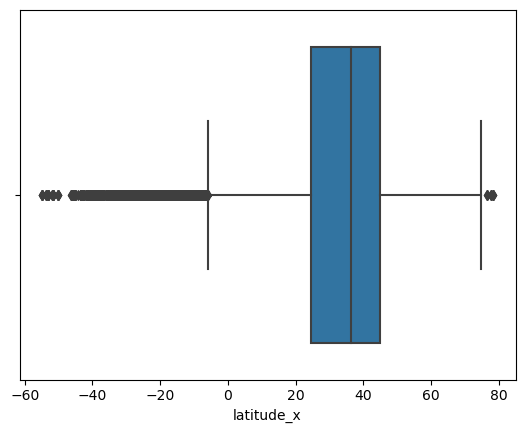

In [64]:
#Graficamos valores numericos en cada columna
import seaborn as sns
sns.boxplot(db_n['latitude_x'])

<AxesSubplot:xlabel='longitude_x'>

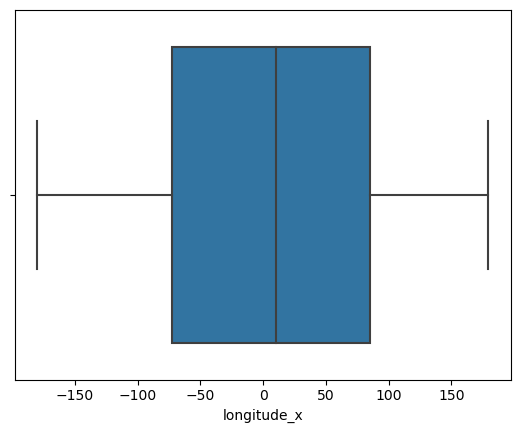

In [65]:
sns.boxplot(db_n['longitude_x'])

<AxesSubplot:xlabel='longitude_y'>

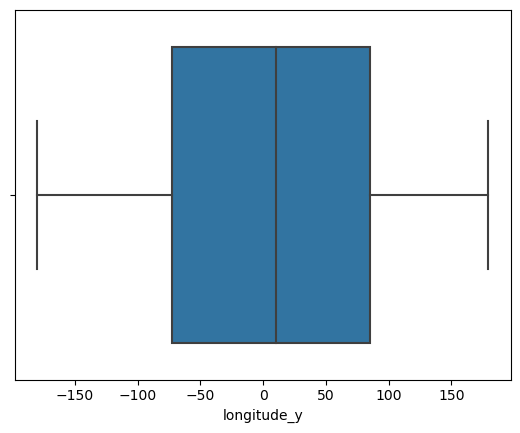

In [66]:
sns.boxplot(db_n['longitude_y'])

<AxesSubplot:xlabel='distance_flown'>

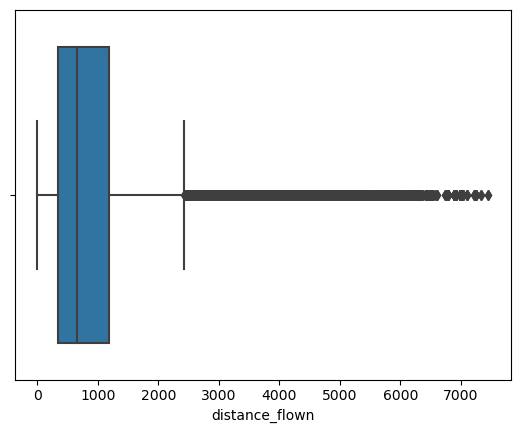

In [67]:
sns.boxplot(db_n['distance_flown'])

<AxesSubplot:xlabel='latitude_y'>

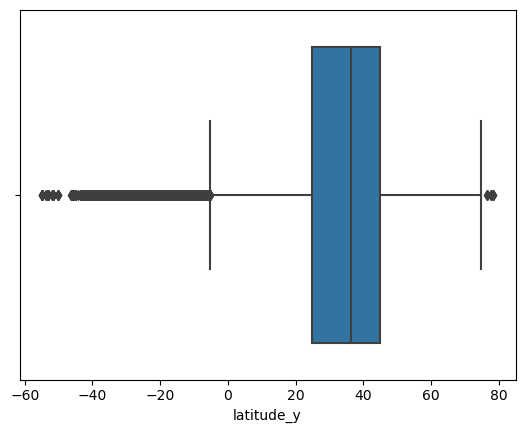

In [68]:
sns.boxplot(db_n['latitude_y'])

In [69]:
#Removemos outliers en datos numericos
for x in ['latitude_x']:
    q75,q25 = np.percentile(db_n.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    db_n.loc[db_n[x] < min,x] = np.nan
    db_n.loc[db_n[x] > max,x] = np.nan

In [70]:
for x in ['latitude_y']:
    q75,q25 = np.percentile(db_n.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    db_n.loc[db_n[x] < min,x] = np.nan
    db_n.loc[db_n[x] > max,x] = np.nan

In [71]:
for x in ['distance_flown']:
    q75,q25 = np.percentile(db_n.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    db_n.loc[db_n[x] < min,x] = np.nan
    db_n.loc[db_n[x] > max,x] = np.nan

In [72]:
#Identificamos X en categoricas y numericos
X_num=db_final2.select_dtypes(include=np.number)
X_cat=db_final2.select_dtypes(include=np.object)

In [73]:
X_cat

,name_x,city_x,country_x,airline,source_airport,destination_airport,equipment,name_y,city_y,country_y
0,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,HGU,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea
1,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,LAE,DH8,Nadzab Airport,Nadzab,Papua New Guinea
2,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,MAG,DH8,Madang Airport,Madang,Papua New Guinea
3,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,POM,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea
4,Goroka Airport,Goroka,Papua New Guinea,PX,GKA,POM,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...
66151,Laguindingan Airport,Cagayan de Oro City,Philippines,PR,CGY,MNL,320,Ninoy Aquino International Airport,Manila,Philippines
66152,Desierto de Atacama Airport,Copiapo,Chile,H2,CPO,CJC,319,El Loa Airport,Calama,Chile
66153,Desierto de Atacama Airport,Copiapo,Chile,H2,CPO,LSC,319,La Florida Airport,La Serena,Chile
66154,Desierto de Atacama Airport,Copiapo,Chile,H2,CPO,SCL,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile


In [74]:
#Vamos a normalizar los valores numericos
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)
x_norm=pd.DataFrame(x_norm)
x_norm

,0,1,2,3,4,5
0,-0.004588,0.109674,0.986665,0.050743,-0.004395,0.108847
1,-0.004583,0.109568,0.985715,0.063951,-0.004951,0.110573
2,-0.004589,0.109699,0.986892,0.043286,-0.003929,0.109998
3,-0.004526,0.108190,0.973317,0.169932,-0.007027,0.109550
4,-0.013509,0.322955,0.728577,0.507260,-0.020976,0.327016
...,...,...,...,...,...,...
66151,0.002166,0.031297,0.993803,0.102135,0.003648,0.030433
66152,-0.005742,-0.014908,0.997721,0.063753,-0.004739,-0.014513
66153,-0.005750,-0.014929,0.999166,0.033838,-0.006310,-0.015018
66154,-0.005736,-0.014893,0.996749,0.077232,-0.007026,-0.014895


In [75]:
#Vamos a tratar con categoricos
X_cat

,name_x,city_x,country_x,airline,source_airport,destination_airport,equipment,name_y,city_y,country_y
0,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,HGU,DH8,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea
1,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,LAE,DH8,Nadzab Airport,Nadzab,Papua New Guinea
2,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,MAG,DH8,Madang Airport,Madang,Papua New Guinea
3,Goroka Airport,Goroka,Papua New Guinea,CG,GKA,POM,DH8,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea
4,Goroka Airport,Goroka,Papua New Guinea,PX,GKA,POM,DH4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...
66151,Laguindingan Airport,Cagayan de Oro City,Philippines,PR,CGY,MNL,320,Ninoy Aquino International Airport,Manila,Philippines
66152,Desierto de Atacama Airport,Copiapo,Chile,H2,CPO,CJC,319,El Loa Airport,Calama,Chile
66153,Desierto de Atacama Airport,Copiapo,Chile,H2,CPO,LSC,319,La Florida Airport,La Serena,Chile
66154,Desierto de Atacama Airport,Copiapo,Chile,H2,CPO,SCL,320,Comodoro Arturo Merino Benítez International A...,Santiago,Chile


In [76]:
X_cat.dtypes

name_x                 object
city_x                 object
country_x              object
airline                object
source_airport         object
destination_airport    object
equipment              object
name_y                 object
city_y                 object
country_y              object
dtype: object

In [77]:
#Vamos a tratar los datos categoricos
from sklearn import preprocessing
labels=X_cat.apply(preprocessing.LabelEncoder().fit_transform)
labels

,name_x,city_x,country_x,airline,source_airport,destination_airport,equipment,name_y,city_y,country_y
0,982,909,158,134,913,1027,84,1865,1762,157
1,982,909,158,134,913,1457,84,1903,1800,157
2,982,909,158,134,913,1626,84,1663,1563,157
3,982,909,158,134,913,2126,84,2196,2104,157
4,982,909,158,369,913,2126,83,2196,2104,157
...,...,...,...,...,...,...,...,...,...,...
66151,1492,427,161,365,474,1742,7,1980,1605,160
66152,662,596,40,211,548,500,6,766,434,40
66153,662,596,40,211,548,1577,6,1481,1404,40
66154,662,596,40,211,548,2330,7,592,2377,40


In [78]:
#Concatenamos la nueva tabla con datos numericos junto con la tabla numerica original
Xc=np.concatenate((x_norm,labels),axis=1)
Xc=pd.DataFrame(Xc)
Xc=Xc.set_axis(['latitude_x','longitude_x','airline_id','distance_flown','latitude_y','longitude_y','name_x','city_x','country_x','airline','source_airport','destination_airport','equipment','name_y','city_y','country_y'],axis=1)

In [79]:
corr_matrix=Xc.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

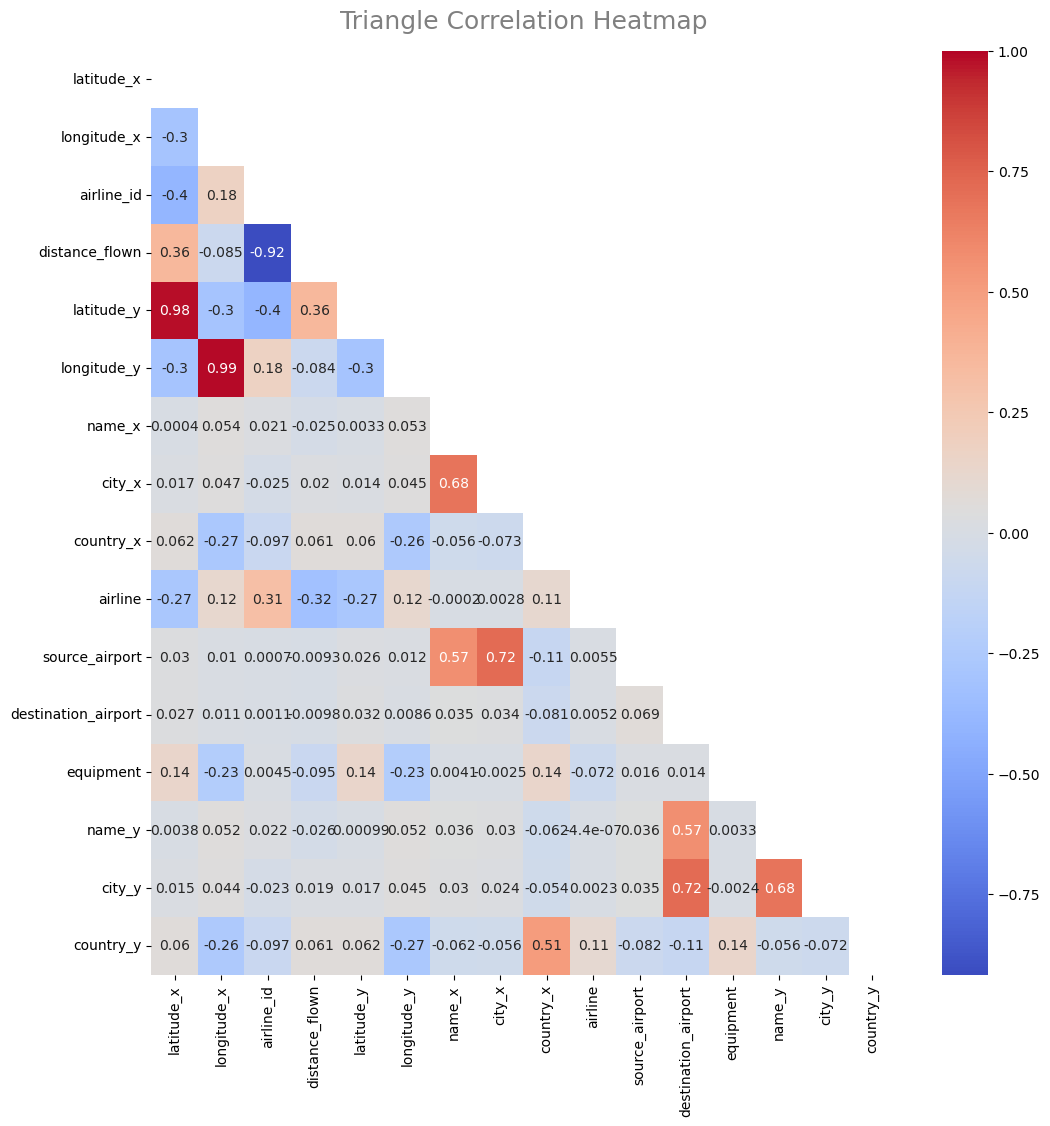

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
mascara=np.triu(np.ones_like(Xc.corr(), dtype=np.bool)) # aislar el triángulo superior de una matriz mientras convierte todos los valores en el triángulo inferior en 
heatmap = sns.heatmap(Xc.corr(), mask=mascara, vmax=1, annot=True, cmap='coolwarm') #podemos establecer el valor maximo y minimo
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')

In [81]:
#Identificamos y
X=Xc.drop(['equipment'], axis=1)
y=Xc['equipment']

In [82]:
#Para aplicar modelos categoricos
ylabel=pd.DataFrame(y)
ylabel=ylabel.apply(preprocessing.LabelEncoder().fit_transform)
Xlabel=X.apply(preprocessing.LabelEncoder().fit_transform)
Xlabel

,latitude_x,longitude_x,airline_id,distance_flown,latitude_y,longitude_y,name_x,city_x,country_x,airline,source_airport,destination_airport,name_y,city_y,country_y
0,3216,63359,27350,4316,3284,63329,982,909,158,134,913,1027,1865,1762,157
1,3219,63358,26859,5626,3004,63399,982,909,158,134,913,1457,1903,1800,157
2,3215,63360,27481,3535,3483,63376,982,909,158,134,913,1626,1663,1563,157
3,3243,63296,22424,15104,2191,63354,982,909,158,134,913,2126,2196,2104,157
4,1084,65897,9196,28785,732,65911,982,909,158,369,913,2126,2196,2104,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66151,9296,54438,31966,9261,11950,54139,1492,427,161,365,474,1742,1980,1605,160
66152,2709,16518,36304,5614,3140,16868,662,596,40,211,548,500,766,434,40
66153,2705,16499,38885,2678,2486,16397,662,596,40,211,548,1577,1481,1404,40
66154,2712,16530,35030,6826,2193,16513,662,596,40,211,548,2330,592,2377,40


In [83]:
#Hacemos el split del arreglo concatenado
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [84]:
#Para datos categoricos en diferentes modelos
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xlabel, ylabel, test_size=0.20, random_state=40)

In [85]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (46309, 15)
X_test shape: (19847, 15)
y_train shape: (46309, 1)
y_test shape: (19847, 1)


In [86]:
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [87]:
lm.fit(X_train,y_train)

LinearRegression()

In [88]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [89]:
#Modelo de prueba Regresion lineal valor numerico
test=lm.predict(X_test)
print('Testing R2 Score:', r2_score(y_test,test))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,test)))
print('Testing MAE:', mean_absolute_error(y_test, test))
print('Testing MAE:', mean_squared_error(y_test, test))

Testing R2 Score: 0.11740510349649114
Testing RMSE: 29.018261543135406
Testing MAE: 24.07350770704912
Testing MAE: 842.0595029858112


In [90]:
#Modelo entrenado Regresion lineal valor numerico
train=lm.predict(X_train)
print('Testing R2 Score:', r2_score(y_train,train))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train,train)))
print('Testing MAE:', mean_absolute_error(y_train,train))
print('Testing MAE:', mean_squared_error(y_train,train))

Testing R2 Score: 0.11381783659383293
Testing RMSE: 29.10436276805188
Testing MAE: 24.123280931350394
Testing MAE: 847.0639321343646


In [91]:
#Modelo de prueba Regresion lineal valor categorico
test=lm.predict(X_test1)
print('Testing R2 Score:', r2_score(y_test1,test))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test1,test)))
print('Testing MAE:', mean_absolute_error(y_test1, test))
print('Testing MAE:', mean_squared_error(y_test1, test))

Testing R2 Score: -5223709279.132105
Testing RMSE: 2257823.251512673
Testing MAE: 1816429.7909764212
Testing MAE: 5097765835071.261


In [92]:
#Modelo entrenado Regresion lineal valor categorico
train=lm.predict(X_train1)
print('Testing R2 Score:', r2_score(y_train1,train))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train1,train)))
print('Testing MAE:', mean_absolute_error(y_train1,train))
print('Testing MAE:', mean_squared_error(y_train1,train))

Testing R2 Score: -5465289536.469089
Testing RMSE: 2278808.1089916714
Testing MAE: 1831652.0728896786
Testing MAE: 5192966397606.197


In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [94]:
#Modelo KNN categorico
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train1, y_train1, cv=5)
knn.fit(X_train1,y_train1)
testknn = knn.predict(X_test1)
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test1,y_test1))

Train Score: 0.4081324133075263
Test Score: 0.42631499395405076


In [95]:
#Datos de prueba KNN categorica
print('Testing R2 Score:', r2_score(y_test1,testknn))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test1,testknn)))
print('Testing MAE:', mean_absolute_error(y_test1, testknn))
print('Testing MAE:', mean_squared_error(y_test1, testknn))

Testing R2 Score: 0.11022756067951633
Testing RMSE: 29.46727095332239
Testing MAE: 16.065522974607013
Testing MAE: 868.3200574365176


In [96]:
#Datos entrenados KNN valor categorico
trainknn=knn.predict(X_train1)
print('Testing R2 Score:', r2_score(y_train1,trainknn))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train1,trainknn)))
print('Testing MAE:', mean_absolute_error(y_train1,trainknn))
print('Testing MAE:', mean_squared_error(y_train1,trainknn))

Testing R2 Score: 0.35665775833275404
Testing RMSE: 24.72419742532924
Testing MAE: 11.217273826619303
Testing MAE: 611.2859383266571


In [97]:
#Modelo KNN numerico
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
testknn2 = knn.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.2116436182120413
Test Score: 0.2192774726658941


In [98]:
#Datos prueba KNN numerica
print('Testing R2 Score:', r2_score(y_test,testknn2))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,testknn2)))
print('Testing MAE:', mean_absolute_error(y_test, testknn2))
print('Testing MAE:', mean_squared_error(y_test, testknn2))

Testing R2 Score: -0.48199787541200356
Testing RMSE: 37.602305653202194
Testing MAE: 25.23917972489545
Testing MAE: 1413.9333904368418


In [99]:
#Datos entrenados KNN valor numerico
trainknn2=knn.predict(X_train)
print('Testing R2 Score:', r2_score(y_train,trainknn2))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train,trainknn2)))
print('Testing MAE:', mean_absolute_error(y_train,trainknn2))
print('Testing MAE:', mean_squared_error(y_train,trainknn2))

Testing R2 Score: -0.1264768300142256
Testing RMSE: 32.813890488836684
Testing MAE: 18.736336349305752
Testing MAE: 1076.7514090133668


In [100]:
#Modelo Decision Tree categorico
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train1, y_train1, cv=5)
dtc.fit(X_train1,y_train1)
dtctest = dtc.predict(X_test1)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test1,y_test1))

Train Score: 0.5061974706431147
Test Score: 0.5281136638452237


In [101]:
#Datos de prueba Decision Tree categoricos
print('Testing R2 Score:', r2_score(y_test1,dtctest))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test1,dtctest)))
print('Testing MAE:', mean_absolute_error(y_test1,dtctest))
print('Testing MAE:', mean_squared_error(y_test1,dtctest))

Testing R2 Score: 0.3351203960935699
Testing RMSE: 25.472522063788766
Testing MAE: 12.086532648125756
Testing MAE: 648.8493802902055


In [102]:
#Datos entrenados Decision Tree categoricos
dtctrain=dtc.predict(X_train1)
print('Testing R2 Score:', r2_score(y_train1,dtctrain))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train1,dtctrain)))
print('Testing MAE:', mean_absolute_error(y_train1,dtctrain))
print('Testing MAE:', mean_squared_error(y_train1,dtctrain))

Testing R2 Score: 1.0
Testing RMSE: 0.0
Testing MAE: 0.0
Testing MAE: 0.0


In [103]:
#Modelo Decision Tree numerica
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
dtctest2 = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.49798082158351675
Test Score: 0.5130246384844057


In [104]:
#Datos prueba Decision Tree numerica
print('Testing R2 Score:', r2_score(y_test,dtctest2))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,dtctest2)))
print('Testing MAE:', mean_absolute_error(y_test, dtctest2))
print('Testing MAE:', mean_squared_error(y_test, dtctest2))

Testing R2 Score: 0.3095114361974147
Testing RMSE: 25.666634712238846
Testing MAE: 12.385045598831057
Testing MAE: 658.776137451504


In [105]:
#Datos entrenados Decision Tree numericos
dtctrain2=dtc.predict(X_train)
print('Testing R2 Score:', r2_score(y_train,dtctrain2))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train,dtctrain2)))
print('Testing MAE:', mean_absolute_error(y_train,dtctrain2))
print('Testing MAE:', mean_squared_error(y_train,dtctrain2))

Testing R2 Score: 1.0
Testing RMSE: 0.0
Testing MAE: 0.0
Testing MAE: 0.0


In [106]:
#Modelo decision categorico Random Forest
#from sklearn.ensemble import RandomForestRegressor
#rf= RandomForestRegressor (random_state=40)
#accuracies = cross_val_score(rf, X_train, y_train, cv=5)
#rf.fit(X_train,y_train)
#rftest = rf.predict(X_test)

In [107]:
#XGBoost Regressor modelo decision categorico
from xgboost import XGBRFRegressor
# Creamos el objeto de XGBoost
xgb = XGBRFRegressor(n_estimators =16,max_depth=16) # Entrenamiento , profundidad de 16
accuracies = cross_val_score(xgb, X_train1, y_train1, cv=5)
xgb.fit(X_train1, y_train1)
print("Train Score:",np.mean(accuracies))
print("Test Score:",xgb.score(X_test1,y_test1))

Train Score: 0.5556724227141416
Test Score: 0.5913583098515073


In [108]:
# Para nuestros datos de prueba XGB categorico
testxgb = xgb.predict(X_test1)
print('Testing R2 Score:', r2_score(y_test1,testxgb))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test1,testxgb)))
print('Testing MAE:', mean_absolute_error(y_test1, testxgb))
print('Testing MAE:', mean_squared_error(y_test1, testxgb))

Testing R2 Score: 0.5913583098515073
Testing RMSE: 19.969710902381177
Testing MAE: 13.401988059336357
Testing MAE: 398.7893535246817


In [109]:
#Datos de entrenamiento XGB categorico
trainxgb = xgb.predict(X_train1)
print('Testing R2 Score:', r2_score(y_train1,trainxgb))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train1,trainxgb)))
print('Testing MAE:', mean_absolute_error(y_train1, trainxgb))
print('Testing MAE:', mean_squared_error(y_train1, trainxgb))

Testing R2 Score: 0.8254309138803766
Testing RMSE: 12.879079914753104
Testing MAE: 8.646425936513275
Testing MAE: 165.87069945059682


In [110]:
#Modelo datos numericos XGB
xgb = XGBRFRegressor(n_estimators =16,max_depth=16) # Entrenamiento , profundidad de 16
accuracies = cross_val_score(xgb, X_train, y_train, cv=5)
xgb.fit(X_train, y_train)
xgbtest2 = xgb.predict(X_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",xgb.score(X_test,y_test))

Train Score: 0.5494818923370351
Test Score: 0.5835043124271442


In [111]:
#Datos de prueba numericos XGB
print('Testing R2 Score:', r2_score(y_test,xgbtest2))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,xgbtest2)))
print('Testing MAE:', mean_absolute_error(y_test, xgbtest2))
print('Testing MAE:', mean_squared_error(y_test, xgbtest2))

Testing R2 Score: 0.5835043124271442
Testing RMSE: 19.934068178339377
Testing MAE: 13.47454648676907
Testing MAE: 397.36707413868254


In [112]:
#Datos entrenamiento numericos XGB
trainxgb2 = xgb.predict(X_train)
print('Testing R2 Score:', r2_score(y_train,trainxgb2))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train,trainxgb2)))
print('Testing MAE:', mean_absolute_error(y_train, trainxgb2))
print('Testing MAE:', mean_squared_error(y_train, trainxgb2))

Testing R2 Score: 0.8274283275543006
Testing RMSE: 12.843439571568604
Testing MAE: 8.687297698781489
Testing MAE: 164.95394002853433


<function matplotlib.pyplot.show(close=None, block=None)>

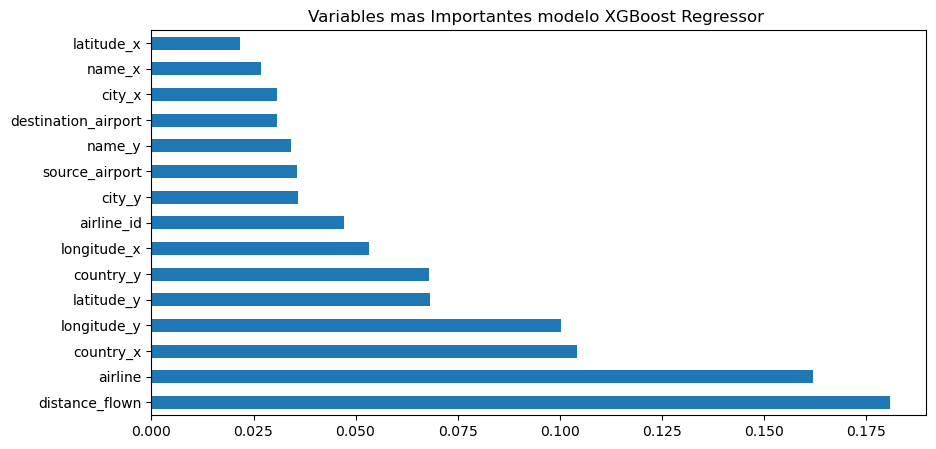

In [113]:
# Graficamos las variables de mayor importancia
plt.figure(figsize=(10,5))
feat_importance_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importance_xgb.nlargest(16).plot(kind='barh' )
plt.title('Variables mas Importantes modelo XGBoost Regressor ')
plt.show

In [114]:
X.to_csv('datafinalnfl.csv')

In [115]:
db_airp.to_csv("dataairps.csv")